In [1]:
import ass2vector
import os
import tensorflow as tf
import collections
import numpy as np
import math
from gensim.models import Word2Vec
from numpy import random

In [2]:
INPUT_PATH = '/home/zju/slx/binarylearning/bisheData/model_input/'

In [3]:
dir_list = os.listdir(INPUT_PATH)
corp =[]
for dir in dir_list:
    file_list = os.listdir(INPUT_PATH+dir)
    for file_name in file_list:
        file_path = INPUT_PATH+dir+'/'+file_name
        f = open(file_path,mode='r')
        content = f.read().split('$')
        corp.append(content)
corp

[['push!rbp!',
  '!mov!rbp!,!rsp!',
  '!sub!rsp!,!',
  '!mov!rax!,!fs!:!',
  '!mov![!rbp!+!var!]!,!rax!',
  '!xor!eax!,!eax!',
  '!lea!rax!,![!rbp!+!var!]!',
  '!mov!rsi!,!rax!',
  '!mov!edi!,!offset!edata!',
  '!call!std!:!:!istream!:!:!operator!>!>!(!int!&!)!',
  '!mov!ecx!,![!rbp!+!var!]!',
  '!mov!edx!,!',
  '!mov!eax!,!ecx!',
  '!imul!edx!',
  '!mov!eax!,!ecx!',
  '!sar!eax!,!',
  '!sub!edx!,!eax!',
  '!mov!eax!,!edx!',
  '!mov!edx!,!eax!',
  '!add!edx!,!edx!',
  '!add!edx!,!eax!',
  '!mov!eax!,!ecx!',
  '!sub!eax!,!edx!',
  '!test!eax!,!eax!',
  '!jnz!loc!mov!ecx!,![!rbp!+!var!]!',
  '!mov!edx!,!',
  '!mov!eax!,!ecx!',
  '!imul!edx!',
  '!sar!edx!,!',
  '!mov!eax!,!ecx!',
  '!sar!eax!,!',
  '!sub!edx!,!eax!',
  '!mov!eax!,!edx!',
  '!mov!edx!,!eax!',
  '!shl!edx!,!',
  '!add!edx!,!eax!',
  '!mov!eax!,!ecx!',
  '!sub!eax!,!edx!',
  '!test!eax!,!eax!',
  '!jnz!short!loc!mov!ecx!,![!rbp!+!var!]!',
  '!mov!edx!,!',
  '!mov!eax!,!ecx!',
  '!imul!edx!',
  '!lea!eax!,![!rdx!+!rcx!]!',
 

In [4]:
setence = [word.split('$') for sublist in corp for word in sublist]

In [5]:
new_sentence = [word.split('!') for sublist in setence for word in sublist]

In [6]:
new_sentence

[['push', 'rbp', ''],
 ['', 'mov', 'rbp', ',', 'rsp', ''],
 ['', 'sub', 'rsp', ',', ''],
 ['', 'mov', 'rax', ',', 'fs', ':', ''],
 ['', 'mov', '[', 'rbp', '+', 'var', ']', ',', 'rax', ''],
 ['', 'xor', 'eax', ',', 'eax', ''],
 ['', 'lea', 'rax', ',', '[', 'rbp', '+', 'var', ']', ''],
 ['', 'mov', 'rsi', ',', 'rax', ''],
 ['', 'mov', 'edi', ',', 'offset', 'edata', ''],
 ['',
  'call',
  'std',
  ':',
  ':',
  'istream',
  ':',
  ':',
  'operator',
  '>',
  '>',
  '(',
  'int',
  '&',
  ')',
  ''],
 ['', 'mov', 'ecx', ',', '[', 'rbp', '+', 'var', ']', ''],
 ['', 'mov', 'edx', ',', ''],
 ['', 'mov', 'eax', ',', 'ecx', ''],
 ['', 'imul', 'edx', ''],
 ['', 'mov', 'eax', ',', 'ecx', ''],
 ['', 'sar', 'eax', ',', ''],
 ['', 'sub', 'edx', ',', 'eax', ''],
 ['', 'mov', 'eax', ',', 'edx', ''],
 ['', 'mov', 'edx', ',', 'eax', ''],
 ['', 'add', 'edx', ',', 'edx', ''],
 ['', 'add', 'edx', ',', 'eax', ''],
 ['', 'mov', 'eax', ',', 'ecx', ''],
 ['', 'sub', 'eax', ',', 'edx', ''],
 ['', 'test', 'eax',

In [6]:
def not_empty(s):
    return s and s.strip()

In [7]:
sentence=[]
for sent in new_sentence:
    sentence.append(filter(not_empty,sent))

In [9]:
sentence

[['push', 'rbp'],
 ['mov', 'rbp', ',', 'rsp'],
 ['sub', 'rsp', ','],
 ['mov', 'rax', ',', 'fs', ':'],
 ['mov', '[', 'rbp', '+', 'var', ']', ',', 'rax'],
 ['xor', 'eax', ',', 'eax'],
 ['lea', 'rax', ',', '[', 'rbp', '+', 'var', ']'],
 ['mov', 'rsi', ',', 'rax'],
 ['mov', 'edi', ',', 'offset', 'edata'],
 ['call',
  'std',
  ':',
  ':',
  'istream',
  ':',
  ':',
  'operator',
  '>',
  '>',
  '(',
  'int',
  '&',
  ')'],
 ['mov', 'ecx', ',', '[', 'rbp', '+', 'var', ']'],
 ['mov', 'edx', ','],
 ['mov', 'eax', ',', 'ecx'],
 ['imul', 'edx'],
 ['mov', 'eax', ',', 'ecx'],
 ['sar', 'eax', ','],
 ['sub', 'edx', ',', 'eax'],
 ['mov', 'eax', ',', 'edx'],
 ['mov', 'edx', ',', 'eax'],
 ['add', 'edx', ',', 'edx'],
 ['add', 'edx', ',', 'eax'],
 ['mov', 'eax', ',', 'ecx'],
 ['sub', 'eax', ',', 'edx'],
 ['test', 'eax', ',', 'eax'],
 ['jnz', 'loc', 'mov', 'ecx', ',', '[', 'rbp', '+', 'var', ']'],
 ['mov', 'edx', ','],
 ['mov', 'eax', ',', 'ecx'],
 ['imul', 'edx'],
 ['sar', 'edx', ','],
 ['mov', 'eax', ',

In [8]:
corpus =[]
corpus = ass2vector.build_dataset(INPUT_PATH,corpus)
len(corpus)

42846328

In [9]:
corpus

['push',
 'rbp',
 '$',
 'mov',
 'rbp',
 ',',
 'rsp',
 '$',
 'sub',
 'rsp',
 ',',
 '$',
 'mov',
 'rax',
 ',',
 'fs',
 ':',
 '$',
 'mov',
 '[',
 'rbp',
 '+',
 'var',
 ']',
 ',',
 'rax',
 '$',
 'xor',
 'eax',
 ',',
 'eax',
 '$',
 'lea',
 'rax',
 ',',
 '[',
 'rbp',
 '+',
 'var',
 ']',
 '$',
 'mov',
 'rsi',
 ',',
 'rax',
 '$',
 'mov',
 'edi',
 ',',
 'offset',
 'edata',
 '$',
 'call',
 'std',
 ':',
 ':',
 'istream',
 ':',
 ':',
 'operator',
 '>',
 '>',
 '(',
 'int',
 '&',
 ')',
 '$',
 'mov',
 'ecx',
 ',',
 '[',
 'rbp',
 '+',
 'var',
 ']',
 '$',
 'mov',
 'edx',
 ',',
 '$',
 'mov',
 'eax',
 ',',
 'ecx',
 '$',
 'imul',
 'edx',
 '$',
 'mov',
 'eax',
 ',',
 'ecx',
 '$',
 'sar',
 'eax',
 ',',
 '$',
 'sub',
 'edx',
 ',',
 'eax',
 '$',
 'mov',
 'eax',
 ',',
 'edx',
 '$',
 'mov',
 'edx',
 ',',
 'eax',
 '$',
 'add',
 'edx',
 ',',
 'edx',
 '$',
 'add',
 'edx',
 ',',
 'eax',
 '$',
 'mov',
 'eax',
 ',',
 'ecx',
 '$',
 'sub',
 'eax',
 ',',
 'edx',
 '$',
 'test',
 'eax',
 ',',
 'eax',
 '$',
 'jnz',
 'loc',

In [10]:
count = collections.Counter(corpus)
count

Counter({'': 4,
         'gai': 1,
         'weilen': 10,
         'dert': 3,
         'zhsh': 3,
         'four': 3,
         'fout': 1,
         'minhang': 2,
         'const': 20437,
         'calculate': 20,
         'shuru': 45,
         'list': 6,
         'aur': 2,
         'swap': 153,
         'alphabetic': 2,
         'recycle': 1,
         'digit': 2,
         'fistp': 1,
         'void': 3968,
         'rem': 2,
         'isoushu': 1,
         'every': 1,
         'fanzhuan': 2,
         'scholar': 2,
         'pingrun': 3,
         'juzi': 3,
         'solution': 1,
         'putcc': 1,
         'chuanran': 2,
         'stum': 17,
         'cmp': 350338,
         'xijun': 5,
         'direct': 4,
         'lian': 1,
         'second': 18,
         'brr': 1,
         'huiwenshu': 5,
         'chen': 2,
         'xingqi': 1,
         'chek': 1,
         'even': 11,
         'panbie': 1,
         'nem': 1,
         'neg': 2594,
         '+': 2681182,
         'tianji': 37,
  

In [11]:
count.most_common()

[('$', 5795827),
 (',', 5413924),
 ('mov', 2765516),
 ('+', 2681182),
 ('[', 2560836),
 (']', 2560836),
 ('rbp', 2483730),
 ('eax', 2304635),
 ('var', 2243929),
 ('rax', 1601814),
 (':', 966839),
 ('add', 650981),
 ('loc', 649912),
 ('rdx', 615240),
 ('edx', 515406),
 ('short', 493537),
 ('cmp', 350338),
 ('call', 349641),
 ('<', 348489),
 ('std', 318431),
 ('char', 312969),
 ('*', 296721),
 ('lea', 276296),
 ('cdqe', 269050),
 ('>', 257691),
 ('sub', 254280),
 ('jmp', 238896),
 ('offset', 216644),
 ('edi', 211533),
 ('rcx', 200621),
 ('ecx', 188654),
 ('shl', 187150),
 ('movsxd', 183222),
 ('rsi', 181411),
 (')', 181223),
 ('(', 181219),
 ('esi', 135634),
 ('ostream', 129349),
 ('rdi', 124836),
 ('s', 123472),
 ('al', 117585),
 ('rsp', 116211),
 ('&', 115756),
 ('jz', 115425),
 ('traits', 101541),
 ('operator', 100259),
 ('movzx', 99259),
 ('jnz', 97979),
 ('xor', 94595),
 ('fs', 94407),
 ('movsd', 90783),
 ('jge', 74922),
 ('int', 66326),
 ('imul', 66054),
 ('push', 64982),
 ('jg', 6

In [13]:
len(count)

2651

In [12]:
count = [['UNK',-1]]
count.extend(collections.Counter(corpus).most_common())
count

[['UNK', -1],
 ('$', 5795827),
 (',', 5413924),
 ('mov', 2765516),
 ('+', 2681182),
 ('[', 2560836),
 (']', 2560836),
 ('rbp', 2483730),
 ('eax', 2304635),
 ('var', 2243929),
 ('rax', 1601814),
 (':', 966839),
 ('add', 650981),
 ('loc', 649912),
 ('rdx', 615240),
 ('edx', 515406),
 ('short', 493537),
 ('cmp', 350338),
 ('call', 349641),
 ('<', 348489),
 ('std', 318431),
 ('char', 312969),
 ('*', 296721),
 ('lea', 276296),
 ('cdqe', 269050),
 ('>', 257691),
 ('sub', 254280),
 ('jmp', 238896),
 ('offset', 216644),
 ('edi', 211533),
 ('rcx', 200621),
 ('ecx', 188654),
 ('shl', 187150),
 ('movsxd', 183222),
 ('rsi', 181411),
 (')', 181223),
 ('(', 181219),
 ('esi', 135634),
 ('ostream', 129349),
 ('rdi', 124836),
 ('s', 123472),
 ('al', 117585),
 ('rsp', 116211),
 ('&', 115756),
 ('jz', 115425),
 ('traits', 101541),
 ('operator', 100259),
 ('movzx', 99259),
 ('jnz', 97979),
 ('xor', 94595),
 ('fs', 94407),
 ('movsd', 90783),
 ('jge', 74922),
 ('int', 66326),
 ('imul', 66054),
 ('push', 649

In [14]:
dictionary = dict()
for word,_ in count:
    dictionary[word] = len(dictionary)
len(dictionary)

2652

In [15]:
dictionary

{'': 883,
 'gai': 2309,
 'weilen': 549,
 'dert': 1055,
 'zhsh': 1056,
 'four': 1057,
 'fout': 1627,
 'minhang': 1233,
 'const': 83,
 'calculate': 400,
 'shuru': 295,
 'aur': 1234,
 'swap': 224,
 'alphabetic': 1235,
 'femalecnt': 890,
 'digit': 1236,
 'fistp': 1629,
 'void': 119,
 'isoushu': 1630,
 'every': 1631,
 'fanzhuan': 1237,
 'scholar': 1260,
 'pingrun': 1058,
 'ref': 1239,
 'solution': 1633,
 'putcc': 1634,
 'chuanran': 1240,
 'cmp': 17,
 'xijun': 799,
 'direct': 884,
 'complement': 2289,
 'calarea': 1635,
 'second': 423,
 'brr': 1848,
 'huiwenshu': 800,
 'chen': 1241,
 'xingqi': 1636,
 'chek': 1637,
 'even': 523,
 'panbie': 1638,
 'nem': 1639,
 'neg': 130,
 '+': 4,
 'tianji': 323,
 'children': 801,
 'checknum': 1640,
 'setprecision': 162,
 'cheng': 615,
 'conduct': 1641,
 'isleapyear': 452,
 'mem': 1642,
 'join': 1243,
 'men': 616,
 'path': 1293,
 'functio': 1643,
 'stevie': 1644,
 'k': 159,
 'credit': 885,
 'cdet': 1645,
 'lineset': 2155,
 'divide': 345,
 'printv': 1647,
 'cmo

In [16]:
data =[]
unk_count = 0
for word in corpus:
    if word in dictionary:
        index = dictionary[word]
    else:
        index = 0
        unk_count = unk_count+1
    data.append(index)
    count[0][1] =unk_count

In [17]:
data

[55,
 7,
 1,
 3,
 7,
 2,
 42,
 1,
 26,
 42,
 2,
 1,
 3,
 10,
 2,
 50,
 11,
 1,
 3,
 5,
 7,
 4,
 9,
 6,
 2,
 10,
 1,
 49,
 8,
 2,
 8,
 1,
 23,
 10,
 2,
 5,
 7,
 4,
 9,
 6,
 1,
 3,
 34,
 2,
 10,
 1,
 3,
 29,
 2,
 28,
 107,
 1,
 18,
 20,
 11,
 11,
 74,
 11,
 11,
 46,
 25,
 25,
 36,
 53,
 43,
 35,
 1,
 3,
 31,
 2,
 5,
 7,
 4,
 9,
 6,
 1,
 3,
 15,
 2,
 1,
 3,
 8,
 2,
 31,
 1,
 54,
 15,
 1,
 3,
 8,
 2,
 31,
 1,
 59,
 8,
 2,
 1,
 26,
 15,
 2,
 8,
 1,
 3,
 8,
 2,
 15,
 1,
 3,
 15,
 2,
 8,
 1,
 12,
 15,
 2,
 15,
 1,
 12,
 15,
 2,
 8,
 1,
 3,
 8,
 2,
 31,
 1,
 26,
 8,
 2,
 15,
 1,
 61,
 8,
 2,
 8,
 1,
 48,
 13,
 3,
 31,
 2,
 5,
 7,
 4,
 9,
 6,
 1,
 3,
 15,
 2,
 1,
 3,
 8,
 2,
 31,
 1,
 54,
 15,
 1,
 59,
 15,
 2,
 1,
 3,
 8,
 2,
 31,
 1,
 59,
 8,
 2,
 1,
 26,
 15,
 2,
 8,
 1,
 3,
 8,
 2,
 15,
 1,
 3,
 15,
 2,
 8,
 1,
 32,
 15,
 2,
 1,
 12,
 15,
 2,
 8,
 1,
 3,
 8,
 2,
 31,
 1,
 26,
 8,
 2,
 15,
 1,
 61,
 8,
 2,
 8,
 1,
 48,
 16,
 13,
 3,
 31,
 2,
 5,
 7,
 4,
 9,
 6,
 1,
 3,
 15,
 2,
 1,
 3,
 8,
 

In [18]:
corpus

['push',
 'rbp',
 '$',
 'mov',
 'rbp',
 ',',
 'rsp',
 '$',
 'sub',
 'rsp',
 ',',
 '$',
 'mov',
 'rax',
 ',',
 'fs',
 ':',
 '$',
 'mov',
 '[',
 'rbp',
 '+',
 'var',
 ']',
 ',',
 'rax',
 '$',
 'xor',
 'eax',
 ',',
 'eax',
 '$',
 'lea',
 'rax',
 ',',
 '[',
 'rbp',
 '+',
 'var',
 ']',
 '$',
 'mov',
 'rsi',
 ',',
 'rax',
 '$',
 'mov',
 'edi',
 ',',
 'offset',
 'edata',
 '$',
 'call',
 'std',
 ':',
 ':',
 'istream',
 ':',
 ':',
 'operator',
 '>',
 '>',
 '(',
 'int',
 '&',
 ')',
 '$',
 'mov',
 'ecx',
 ',',
 '[',
 'rbp',
 '+',
 'var',
 ']',
 '$',
 'mov',
 'edx',
 ',',
 '$',
 'mov',
 'eax',
 ',',
 'ecx',
 '$',
 'imul',
 'edx',
 '$',
 'mov',
 'eax',
 ',',
 'ecx',
 '$',
 'sar',
 'eax',
 ',',
 '$',
 'sub',
 'edx',
 ',',
 'eax',
 '$',
 'mov',
 'eax',
 ',',
 'edx',
 '$',
 'mov',
 'edx',
 ',',
 'eax',
 '$',
 'add',
 'edx',
 ',',
 'edx',
 '$',
 'add',
 'edx',
 ',',
 'eax',
 '$',
 'mov',
 'eax',
 ',',
 'ecx',
 '$',
 'sub',
 'eax',
 ',',
 'edx',
 '$',
 'test',
 'eax',
 ',',
 'eax',
 '$',
 'jnz',
 'loc',

In [19]:
# import modules & set up logging
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [20]:
model = Word2Vec(sentences=sentence,size=128,batch_words=128,iter=5,workers=6,min_count=0)

2017-11-06 15:52:06,018 : INFO : collecting all words and their counts
2017-11-06 15:52:06,019 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-06 15:52:06,032 : INFO : PROGRESS: at sentence #10000, processed 52321 words, keeping 100 word types
2017-11-06 15:52:06,044 : INFO : PROGRESS: at sentence #20000, processed 108983 words, keeping 108 word types
2017-11-06 15:52:06,055 : INFO : PROGRESS: at sentence #30000, processed 165716 words, keeping 117 word types
2017-11-06 15:52:06,066 : INFO : PROGRESS: at sentence #40000, processed 221276 words, keeping 134 word types
2017-11-06 15:52:06,078 : INFO : PROGRESS: at sentence #50000, processed 278291 words, keeping 134 word types
2017-11-06 15:52:06,094 : INFO : PROGRESS: at sentence #60000, processed 332520 words, keeping 138 word types
2017-11-06 15:52:06,106 : INFO : PROGRESS: at sentence #70000, processed 386700 words, keeping 138 word types
2017-11-06 15:52:06,117 : INFO : PROGRESS: at sentence #80000

In [21]:
len(model.wv.vocab)

2649

In [22]:
word_vec =np.ndarray(shape=(2649,128),dtype=np.float32)
word_label = np.ndarray(shape=(2649,1),dtype=object)
i=0
for key in model.wv.vocab:
    word_vec[i] = model.wv.word_vec(key)
    word_label[i] = key
    i=i+1
word_vec.shape,word_label.shape

((2649, 128), (2649, 1))

In [23]:
word_label

array([['gai'],
       ['weilen'],
       ['dert'],
       ..., 
       ['spinout'],
       ['sqr'],
       ['putapples']], dtype=object)

In [26]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
Nom = Normalizer()
nom_vec = Nom.fit_transform(word_vec)
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
twod_wordvec = tsne.fit_transform(nom_vec)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

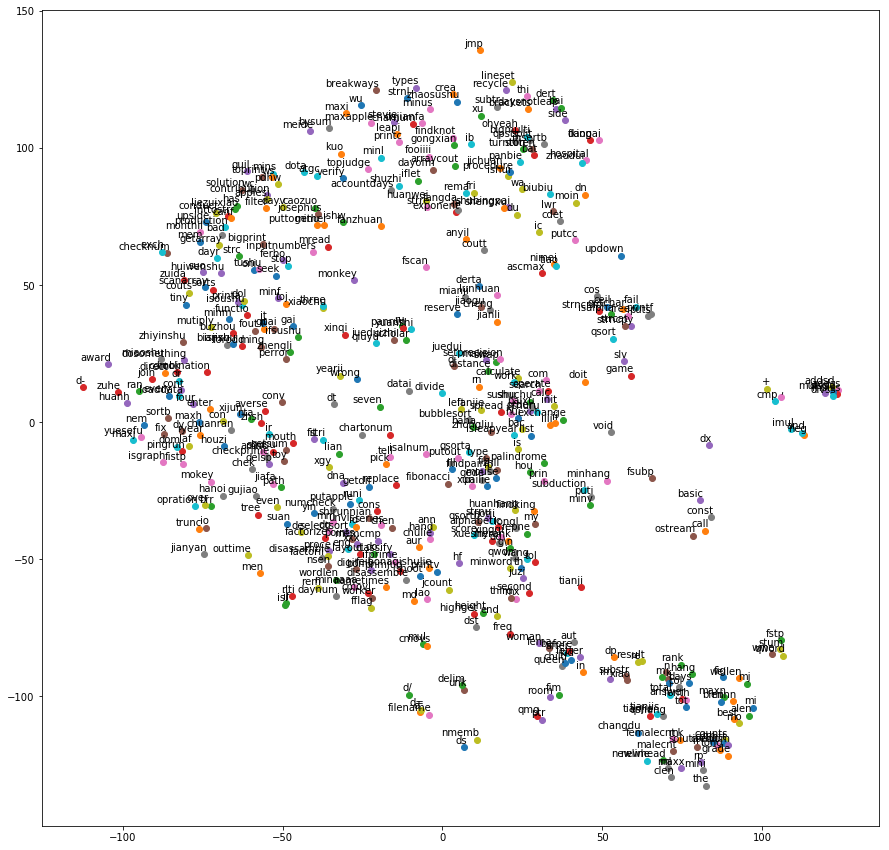

In [31]:
plt.figure(figsize=(15,15))  # in inches

for i in range(500):
    x,y=twod_wordvec[i]
    key = word_label[i][0]
    plt.scatter(x, y)
    plt.annotate(key, xy=(x, y), xytext=(3,2), textcoords='offset points',
                     ha='right', va='bottom')
plt.show()

In [32]:
reverse_dictionary = dict(zip(dictionary.values(),dictionary.keys()))

In [33]:
reverse_dictionary

{0: 'UNK',
 1: '$',
 2: ',',
 3: 'mov',
 4: '+',
 5: '[',
 6: ']',
 7: 'rbp',
 8: 'eax',
 9: 'var',
 10: 'rax',
 11: ':',
 12: 'add',
 13: 'loc',
 14: 'rdx',
 15: 'edx',
 16: 'short',
 17: 'cmp',
 18: 'call',
 19: '<',
 20: 'std',
 21: 'char',
 22: '*',
 23: 'lea',
 24: 'cdqe',
 25: '>',
 26: 'sub',
 27: 'jmp',
 28: 'offset',
 29: 'edi',
 30: 'rcx',
 31: 'ecx',
 32: 'shl',
 33: 'movsxd',
 34: 'rsi',
 35: ')',
 36: '(',
 37: 'esi',
 38: 'ostream',
 39: 'rdi',
 40: 's',
 41: 'al',
 42: 'rsp',
 43: '&',
 44: 'jz',
 45: 'traits',
 46: 'operator',
 47: 'movzx',
 48: 'jnz',
 49: 'xor',
 50: 'fs',
 51: 'movsd',
 52: 'jge',
 53: 'int',
 54: 'imul',
 55: 'push',
 56: 'jg',
 57: 'jle',
 58: 'ptr',
 59: 'sar',
 60: 'printf',
 61: 'test',
 62: 'scanf',
 63: 'basic',
 64: 'ds',
 65: 'retn',
 66: 'format',
 67: 'chk',
 68: 'stack',
 69: 'fail',
 70: 'leave',
 71: 'locret',
 72: 'rbx',
 73: 'cs',
 74: 'istream',
 75: 'byte',
 76: 'd',
 77: 'c',
 78: 'movss',
 79: 'pxor',
 80: 'qword',
 81: 'dword',
 

In [34]:
data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips): 
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

print('data:', [reverse_dictionary[di] for di in data[:8]])

for num_skips, skip_window in [(2, 1), (4, 2)]:
    data_index = 0
    batch, labels = generate_batch(batch_size=8, num_skips=num_skips, skip_window=skip_window)
    print('\nwith num_skips = %d and skip_window = %d:' % (num_skips, skip_window))
    print('    batch:', [reverse_dictionary[bi] for bi in batch])
    print('    labels:', [reverse_dictionary[li] for li in labels.reshape(8)])

('data:', ['push', 'rbp', '$', 'mov', 'rbp', ',', 'rsp', '$'])

with num_skips = 2 and skip_window = 1:
('    batch:', ['rbp', 'rbp', '$', '$', 'mov', 'mov', 'rbp', 'rbp'])
('    labels:', ['$', 'push', 'rbp', 'mov', 'rbp', '$', ',', 'mov'])

with num_skips = 4 and skip_window = 2:
('    batch:', ['$', '$', '$', '$', 'mov', 'mov', 'mov', 'mov'])
('    labels:', ['rbp', 'rbp', 'push', 'mov', 'rbp', '$', 'rbp', ','])


In [35]:
len(dictionary),len(reverse_dictionary),len(corpus),len(data)

(2652, 2652, 42846328, 42846328)

In [36]:
vocabulary_size = len(dictionary)
batch_size = 128
embedding_size = 128 
skip_window = 1 
num_skips = 2
num_sampled = 64 # Number of negative examples to sample.

graph = tf.Graph()
with graph.as_default():
    train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    embeddings = tf.Variable(
    tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    softmax_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                         stddev=1.0 / math.sqrt(embedding_size)))
    softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))
    embed = tf.nn.embedding_lookup(embeddings, train_dataset)
    loss = tf.reduce_mean(
    tf.nn.sampled_softmax_loss(weights=softmax_weights, biases=softmax_biases, inputs=embed,
                               labels=train_labels, num_sampled=num_sampled, num_classes=vocabulary_size))
    optimizer = tf.train.AdagradOptimizer(0.005).minimize(loss)
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    
num_steps = 100000
data_index =0

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    average_loss = 0
    for step in range(num_steps):
        batch_data, batch_labels = generate_batch(
           batch_size, num_skips, skip_window)
        feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
        _, cost = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += cost
        if step % 2000 == 0:
            if step > 0:
                average_loss = average_loss / 2000
            print('Average loss at step %d: %f' % (step, average_loss))
            average_loss = 0
    final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step 0: 7.570245
Average loss at step 2000: 4.193374
Average loss at step 4000: 2.566820
Average loss at step 6000: 1.986126
Average loss at step 8000: 1.787975
Average loss at step 10000: 2.209862
Average loss at step 12000: 2.192648
Average loss at step 14000: 1.919877
Average loss at step 16000: 1.783711
Average loss at step 18000: 1.688227
Average loss at step 20000: 1.941692
Average loss at step 22000: 1.958351
Average loss at step 24000: 1.849286
Average loss at step 26000: 1.667057
Average loss at step 28000: 1.520107
Average loss at step 30000: 1.508611
Average loss at step 32000: 1.841697
Average loss at step 34000: 1.717287
Average loss at step 36000: 1.528330
Average loss at step 38000: 1.472946
Average loss at step 40000: 1.695613
Average loss at step 42000: 1.684139
Average loss at step 44000: 1.635713
Average loss at step 46000: 1.538834
Average loss at step 48000: 1.509326
Average loss at step 50000: 1.560235
Average loss at step 52000: 1.5186

In [37]:
final_embeddings.shape

(2652, 128)

In [ ]:
num_points = 500

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
two_d_embeddings = tsne.fit_transform(final_embeddings)

In [90]:
from matplotlib import pylab
import matplotlib.pyplot as plt
%matplotlib inline

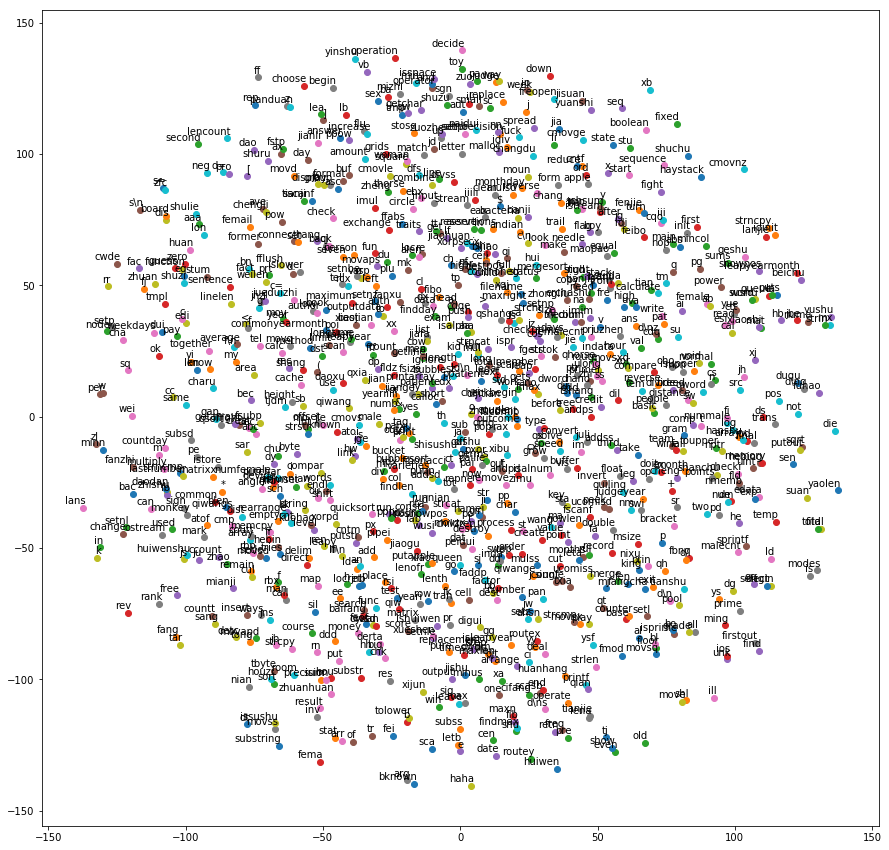

In [91]:
def plot(embeddings, labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(15,15))  # in inches
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(3,2), textcoords='offset points',
                     ha='right', va='bottom')
    plt.show()

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

In [36]:
word_vec

array([[ -1.82982874e+00,  -9.14898217e-02,   4.52032126e-03, ...,
          4.99341875e-01,   6.29560292e-01,  -6.97540104e-01],
       [  6.55492993e-10,   6.73810729e-10,   1.72824468e-04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.62529306e-06,   2.74514332e-06,   4.24862083e-05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [ -1.21735416e-01,   1.31774396e-01,   1.45022571e-01, ...,
         -1.41923446e-02,   1.49759412e-01,  -1.30939130e-02],
       [  1.14002481e-01,   1.68695122e-01,  -7.58689493e-02, ...,
         -1.29397854e-01,   3.97759080e-02,  -3.82746235e-02],
       [  1.10246725e-02,   1.78723440e-01,   2.66767256e-02, ...,
         -7.57540688e-02,   3.39084640e-02,  -6.44957125e-02]], dtype=float32)

In [67]:
from sklearn.preprocessing import Normalizer
Nom = Normalizer()
nom_vec = Nom.fit_transform(word_vec)

In [68]:
nom_vec

array([[-0.22573456, -0.08143229,  0.0206035 , ..., -0.10676114,
        -0.0403536 ,  0.00825544],
       [-0.12163199, -0.13369378,  0.09053677, ..., -0.08066981,
         0.07736198, -0.05969876],
       [-0.17236871, -0.1308191 ,  0.01087955, ...,  0.06709434,
         0.06077142, -0.02190906],
       ..., 
       [ 0.03412641,  0.01878249,  0.14857233, ..., -0.05218453,
        -0.02768124, -0.12954846],
       [-0.16313028, -0.17419052,  0.09859007, ...,  0.04492468,
         0.00587007, -0.07957786],
       [-0.20790802, -0.01039522,  0.00051361, ...,  0.05673601,
         0.07153163, -0.0792556 ]], dtype=float32)

In [69]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
twod_wordvec = tsne.fit_transform(nom_vec)

In [70]:
word_label

array([['all'],
       ['dist'],
       ['sch'],
       ['qian'],
       ['weilen'],
       ['yushu'],
       ['edi'],
       ['sca'],
       ['month'],
       ['gg'],
       ['go'],
       ['edx'],
       ['children'],
       ['row'],
       ['inverse'],
       ['const'],
       ['calculate'],
       ['tt'],
       ['show'],
       ['tr'],
       ['leap'],
       ['tp'],
       ['qxia'],
       ['shuru'],
       ['to'],
       ['init'],
       ['tm'],
       ['tj'],
       ['swap'],
       ['th'],
       ['c='],
       ['isspace'],
       ['sprintf'],
       ['woman'],
       ['void'],
       ['moun'],
       ['print'],
       ['fan'],
       ['decide'],
       ['rec'],
       ['fac'],
       ['issushu'],
       ['arrange'],
       ['dil'],
       ['level'],
       ['list'],
       ['leave'],
       ['p'],
       ['dijitian'],
       ['team'],
       ['nptr'],
       ['div'],
       ['stum'],
       ['inda'],
       ['cmp'],
       ['zl'],
       ['xijun'],
       ['zh'],
       ['tem

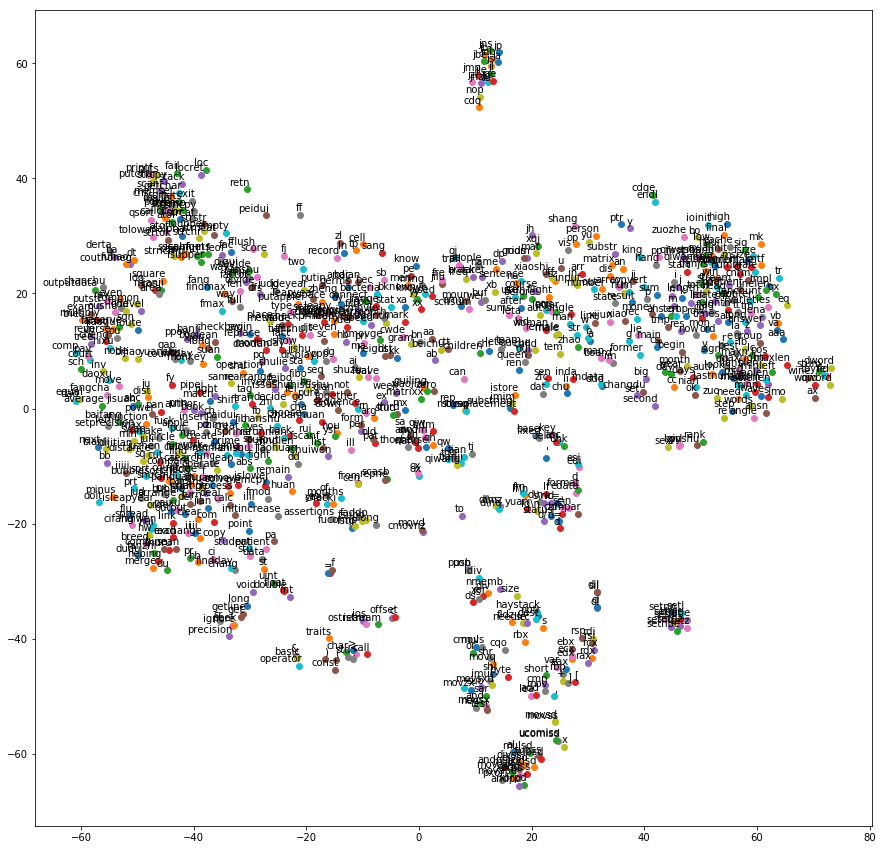

In [71]:
plt.figure(figsize=(15,15))  # in inches

for i in range(881):
    x,y=twod_wordvec[i]
    key = word_label[i][0]
    plt.scatter(x, y)
    plt.annotate(key, xy=(x, y), xytext=(3,2), textcoords='offset points',
                     ha='right', va='bottom')
plt.show()

In [31]:
[reverse_dictionary[j] for j in range(1,num_points+1)]

['$',
 ',',
 'mov',
 '+',
 '[',
 ']',
 'rbp',
 'eax',
 'var',
 'rax',
 ':',
 'add',
 'loc',
 'rdx',
 'edx',
 'short',
 'cmp',
 'call',
 '<',
 'std',
 'char',
 '*',
 'lea',
 'cdqe',
 '>',
 'sub',
 'jmp',
 'offset',
 'edi',
 'rcx',
 'ecx',
 'shl',
 'movsxd',
 'rsi',
 ')',
 '(',
 'esi',
 'ostream',
 'rdi',
 's',
 'al',
 'rsp',
 '&',
 'jz',
 'traits',
 'operator',
 'movzx',
 'jnz',
 'xor',
 'fs',
 'movsd',
 'jge',
 'int',
 'imul',
 'push',
 'jg',
 'jle',
 'ptr',
 'sar',
 'printf',
 'test',
 'scanf',
 'basic',
 'ds',
 'retn',
 'format',
 'chk',
 'stack',
 'fail',
 'leave',
 'locret',
 'rbx',
 'cs',
 'istream',
 'byte',
 'd',
 'c',
 'movss',
 'pxor',
 'qword',
 'dword',
 'movsx',
 'const',
 'pop',
 'jl',
 'endl',
 'strlen',
 'nop',
 'dl',
 'putchar',
 'puts',
 'mulsd',
 'movapd',
 'shr',
 'unk',
 'ucomisd',
 'ebx',
 'subsd',
 'divsd',
 'addsd',
 'rep',
 'stosq',
 'a',
 'jbe',
 'x',
 'gets',
 'edata',
 'n',
 'js',
 'src',
 'and',
 'idiv',
 'cdq',
 'base',
 'getchar',
 'sqrt',
 'dest',
 'doubl

In [32]:
reverse_dictionary

{0: 'UNK',
 1: '$',
 2: ',',
 3: 'mov',
 4: '+',
 5: '[',
 6: ']',
 7: 'rbp',
 8: 'eax',
 9: 'var',
 10: 'rax',
 11: ':',
 12: 'add',
 13: 'loc',
 14: 'rdx',
 15: 'edx',
 16: 'short',
 17: 'cmp',
 18: 'call',
 19: '<',
 20: 'std',
 21: 'char',
 22: '*',
 23: 'lea',
 24: 'cdqe',
 25: '>',
 26: 'sub',
 27: 'jmp',
 28: 'offset',
 29: 'edi',
 30: 'rcx',
 31: 'ecx',
 32: 'shl',
 33: 'movsxd',
 34: 'rsi',
 35: ')',
 36: '(',
 37: 'esi',
 38: 'ostream',
 39: 'rdi',
 40: 's',
 41: 'al',
 42: 'rsp',
 43: '&',
 44: 'jz',
 45: 'traits',
 46: 'operator',
 47: 'movzx',
 48: 'jnz',
 49: 'xor',
 50: 'fs',
 51: 'movsd',
 52: 'jge',
 53: 'int',
 54: 'imul',
 55: 'push',
 56: 'jg',
 57: 'jle',
 58: 'ptr',
 59: 'sar',
 60: 'printf',
 61: 'test',
 62: 'scanf',
 63: 'basic',
 64: 'ds',
 65: 'retn',
 66: 'format',
 67: 'chk',
 68: 'stack',
 69: 'fail',
 70: 'leave',
 71: 'locret',
 72: 'rbx',
 73: 'cs',
 74: 'istream',
 75: 'byte',
 76: 'd',
 77: 'c',
 78: 'movss',
 79: 'pxor',
 80: 'qword',
 81: 'dword',
 